ЛАБОРАТОРНАЯ РАБОТА 3. МЕТРИЧЕСКИЕ МЕТОДЫ КЛАССИФИКАЦИИ

Цели и задачи

Цель лабораторной работы: изучение принципов построения информационных систем с использованием метрических методов классификации.
Основные задачи:
–	изучение инструментария Python для реализации алгоритмов метрической классификации;
–	изучение 	методов 	оптимизации 	параметров 	метрической
классификации;
–	освоение модификаций kNN-метода.
Оборудование и материалы

Для выполнения лабораторной работы рекомендуется использовать персональный компьютер со следующими программными средствами разработки (выбрать один или несколько програмных продуктов для практической реализации задач лабораторной работы): MS Visual Studio 2013 и выше; среда разработки Java, интерпретатор Python (Jupyter Notebook).

Методика и порядок выполнения работы

Перед выполнением индивидуального задания рекомендуется выполнить все пункты учебной задачи.

Постановка задачи.
В рамках данной задачи рассматривается построение классификатора с использованием метода ближайших соседей. В качестве набора данных используются данные об ирисах Фишера.
В рамках данной лабораторной работы рекомендуется использование библиотеки pandas. Pandas – это библиотека Python, предоставляющая широкие возможности для анализа данных. Данные, с которыми работают специалисты Data Science, часто хранятся в табличном формате (.csv, .tsv, .xlsx, …). С помощью библиотеки Pandas данные удобно загружать, обрабатывать и анализировать с помощью SQL-подобных запросов. Pandas предоставляет широкие возможности визуального анализа табличных данных в связке с библиотеками Matplotlib и Seaborn.  
Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй – это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.
1.	На рис. 29 представлен код в Python Notebook для загрузки исходного набора данных.


In [1]:
import pandas as pd
import numpy as np

data_source = 'iris.data'
d = pd.read_table(data_source, delimiter=',')
d.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Следует обратить внимание, что первая строка набора данных интерпретировалась как шапка таблицы (название столбцов). Данную неточность необходимо исправить следующим образом (рис. 30). В таком случае столбцы получат порядковые номера в качестве названий столбцов.

In [2]:
import pandas as pd
import numpy as np

data_source = 'iris.data'
d = pd.read_table(data_source, delimiter=',', header = None)
d.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Исследователь также может дать символьные имена столбцам при загрузке (рис. 31).

In [3]:
import pandas as pd
import numpy as np

data_source = 'iris.data'
d = pd.read_table(data_source, delimiter=',',
                  header=None,
                  names=['sepal_length','sepal_width',
                         'petal_length', 'petal_width','answer'])
d.head()

,sepal_length,sepal_width,petal_length,petal_width,answer
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2.	После загрузки данных можно визуализировать полученныйы набор данных. Для визуализации будем использовать библиотеку seaborn
(рис. 32).


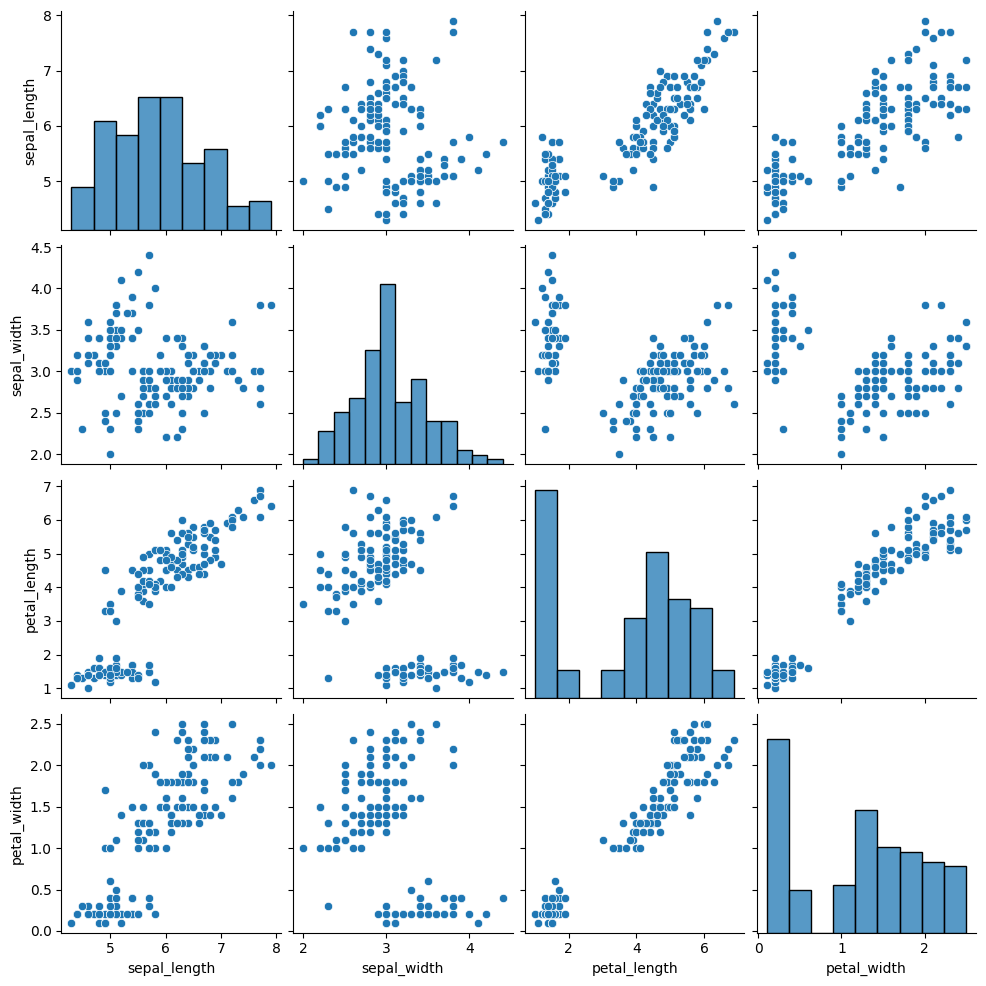

In [4]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d)

В результате будет выведен график, отображающий распределение объектов попарно по различным признакам.
На графике попарного распределения видно преимущество символьного обозначения столбцов – график легче интерпретировать. Отдельные классы не отмечаются различными цветами, но видно, что на отдельных подграфиках множества точек разделены. Следует обратить внимание на подграфики, расположенные по диаганали. Подумайте, что они отображают?

3.	Для придания отдельным классам своих цветов необходимо указать, по какому признаку разделяются точки (рис. 34).

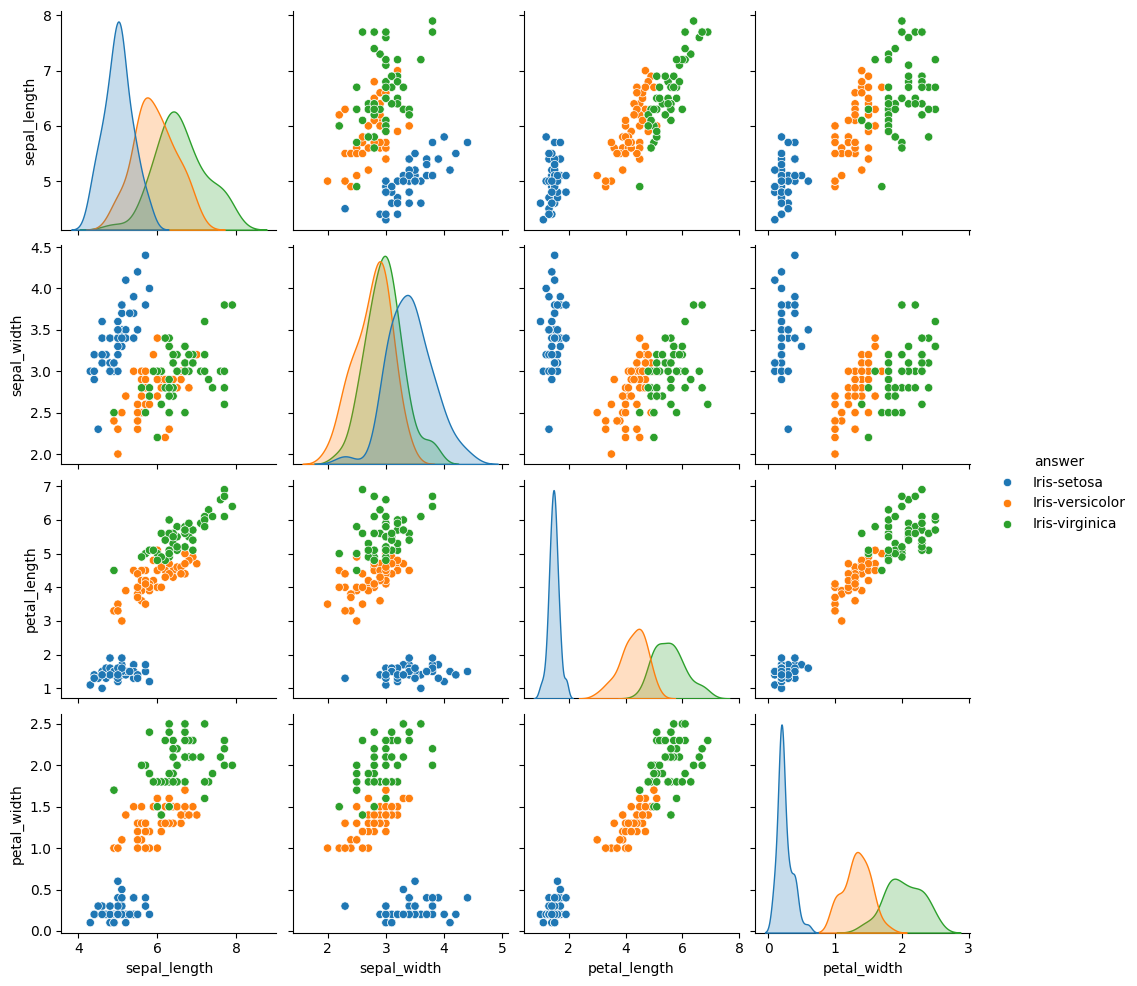

In [5]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d, hue='answer')

Можно изменить маркеры каждого класса. Для этого необходимо использовать код: sb.pairplot(d, hue='answer', markers=["o", "s", "D"]).
4.	Перейдем к построению модели. Модель метрической классификации должна обеспечивать следующий алгоритм работы: пользователь вводит новое признаковое описание объекта (объект отсутствует в обучающей выборке), а алгоритм классификации относит новый объект к одному из классов ирисов.
5.	Существует несколько вариаций метода ближайших соседей. Каждая модель предполагает наличие различных параметров для оптимизации. Воспользуемся библиотекой scikit для построения классификатора (рис. 36).


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train = d[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

y_train = d['answer']

K = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train, y_train)

# Использование классификатора
# Объявление признаков объекта
X_test = np.array([[1.2, 1.0, 2.8, 1.2]])
# Получение ответа для нового объекта
target = knn.predict(X_test)
print(target)

['Iris-versicolor']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Для прелставленного объекта X_test попробуйте поменять значение признаков и проследите за изменением значения выходного класса.

6.	Модель построена и выдает ответ для новых (отсутствующих в исходной выборке) объектов. Но, анализируя код на рис. 36, следует отметить следующие недостатки такого подхода:
–	в качестве количества ближайших соседей выбрано значение K=3, выбор данного значения не обосновывается, но в данном методе именно данный параметр должен оптимизироваться;
–	отсутствует какое-либо графическое представление модели, нет визуализации процесса принятия решения.
Исправим данные недостатки.
7.	Займемся обоснованием выбора оптимального значения количества ближайших соседей. Для этого будем использовать простейшую оценку качества hold-out (рис. 37).


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = \
          train_test_split(d[['sepal_length','sepal_width',
                              'petal_length', 'petal_width']],
                              d['answer'],
                              test_size=0.3,
                              random_state=17)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.9777777777777777


В качестве эксперимента попробуйте поменять значение количества соседей и расмотрите изменение точности класификатора.

8.	Еще одна оценка качества – cross validation (CV) error. На рис. 3.10 показан алгоритм получения оценки точности классификации CV и процедура выбора оптимального значения количества соседей в алгоритме kNN на основе данной оценки.


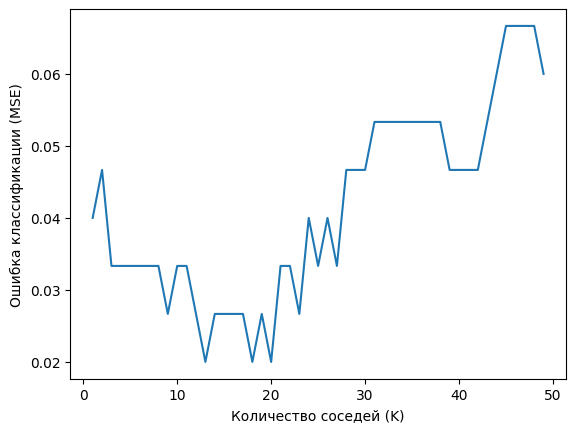

Оптимальные значения K:  [13, 18, 20]


In [16]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра К
k_list = list(range(1,50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения К
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, d.iloc[ : , 0:4 ], d['answer'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt. plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

#Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
      all_k_min.append(k_list[i])

# печатаем все К, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)

Важные замечания
1.	При выборе набора данных (data set) на ресурсах [3, 4] необходимо согласовать свой выбор с другими студентами группы и преподавателем с целью недопустимости выбора одинаковых вариантов.
2.	В рамках данного лабораторного курса рекомендуется использовать инструментарий Python (библиотеки, среду разработки) для решения поставленных задач.
3.	При выборе набора данных следует отдавать предпочтение тем наборам, которые имеют следующие характеристики: содержат не более 5 признаков на объект; все признаки – числовые; желательно отсутствие пропусков в данных.

Индивидуальное задание
1.	Студент самостоятельно выбирает набор данных на ресурсах [3, 4] для построения классификатора с использованием метода ближайших соседей и согласует свой выбор с преподавателем.
2.	Выполните построение модели классификации на основе метода ближайших соседей. В ходе решения задачи необходимо решить следующие подзадачи:
2.1	Построение классификатора с заданием K (количества ближайших соседей) пользователем;
2.2	Вычисление оценки hold-out для различнх значений K, а также для различных долей обучающей и тестирующей подвыборок;
2.3	Вычисление оценки cross validation для различных значений K, а также для различных значений fold (количества подмножеств при кроссвалидации).
2.4	Вычислите оптимальные значения K. Обоснуйте свой выбор.
Продемонстрируйте использование полученного классификатора.

Содержание отчета и его форма

Отчет по лабораторной работе должен содержать:
1.	Номер и название лабораторной работы; задачи лабораторной работы.
2.	Реализация каждого пункта подраздела «Индивидуальное задание» с приведением исходного кода программы, диаграмм и графиков для визуализации данных.
3.	Ответы на контрольные вопросы.
4.	Экранные формы (консольный вывод) и листинг программного кода с комментариями, показывающие порядок выполнения лабораторной работы, и результаты, полученные в ходе её выполнения.
Отчет о выполнении лабораторной работы сдается преподавателю.

Контрольные вопросы

1.	Поясните особенности основных методов метрической классификации: метод ближайшего соседа, метод k ближайших соседей.
2.	Поясните основные принципы и этапы реализации метода kNN.
3.	Поясните принцип выбора количества соседних объектов, по которым определяется принадлежность целевого объекта к результирующему классу.
4.	В чем заключается метод парзеновского окна?
5.	Поясните принцип метода потенциальных функций.
6.	Назовите, какие параметры оптимизируют в методах kNN?

Список литературы

Для выполнения лабораторной работы, при подготовке к защите, а также для ответа на контрольные вопросы рекомендуется использовать следующие
источники: [1-5].

